# Build basic 2-Layer MLP to solve the xor-Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generatio

In [2]:
X, y = make_blobs(n_samples=200, n_features=2, cluster_std=.1
                  ,centers= [(1,1), (1,0), (0,0),(0,1)])

In [179]:
y[y==2]=0
y[y==3]=1

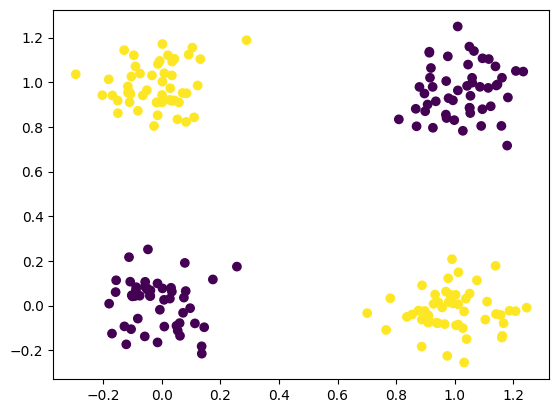

In [180]:
plt.scatter(X[:,0],X[:,1],c=y)

## Steps:
* build train and test sets
* write MLP class in Pytorch with two layers with adjustable number of perceptrons
* use nn.linear and nn.Sigmoid() units
* train your model
* test your model

In [277]:
import torch
class MLP(torch.nn.Module): #all nets inherit from nn.Module
    def __init__(self): #define layer types
        super(MLP, self).__init__()
        self.fc1 = torch.nn.Linear(2,4,bias=False) #1st layer input dim = 2, output =4 - | input needs to have size of data
        self.fc2 = torch.nn.Linear(4,1,bias=True) #2nd layer input 4 out put 2 | output needs to be one for binary problem
        self.non_linear = torch.nn.Sigmoid() #non-linear activation

    def forward(self, x): #build network
        output = self.fc1(x) #w*X
        output = self.non_linear(output) # activation
        output = self.fc2(output) #w*X
        output = self.non_linear(output) # activation

        return output

In [278]:

from sklearn.model_selection import train_test_split #for test set generation
#split in train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#np->torch
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)


In [279]:
print(x_train.shape,y_train.shape)

torch.Size([134, 2]) torch.Size([134])


In [280]:
#get instance of perceptron model
model = MLP()

#define loss function
criterion = torch.nn.BCELoss()

#define optimizer -> SGD with learning rate lr
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

In [281]:
#show model
print(model)

MLP(
  (fc1): Linear(in_features=2, out_features=4, bias=False)
  (fc2): Linear(in_features=4, out_features=1, bias=True)
  (non_linear): Sigmoid()
)


In [282]:
model.train() #set to train mode
iterations = 5000
for iter in range(iterations):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_train)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train)

    print('Iter {}: train loss: {}'.format(iter, loss.item()))
    # Backward pass
    loss.backward()
    #make gradient update
    optimizer.step()

Iter 0: train loss: 0.7262821793556213
Iter 1: train loss: 0.7234851717948914
Iter 2: train loss: 0.7209308743476868
Iter 3: train loss: 0.718599259853363
Iter 4: train loss: 0.7164716124534607
Iter 5: train loss: 0.7145308256149292
Iter 6: train loss: 0.7127610445022583
Iter 7: train loss: 0.7111476063728333
Iter 8: train loss: 0.7096769213676453
Iter 9: train loss: 0.7083368897438049
Iter 10: train loss: 0.7071160078048706
Iter 11: train loss: 0.7060039639472961
Iter 12: train loss: 0.7049910426139832
Iter 13: train loss: 0.7040687203407288
Iter 14: train loss: 0.7032288908958435
Iter 15: train loss: 0.7024642825126648
Iter 16: train loss: 0.7017682194709778
Iter 17: train loss: 0.701134443283081
Iter 18: train loss: 0.7005575895309448
Iter 19: train loss: 0.7000325918197632
Iter 20: train loss: 0.6995546221733093
Iter 21: train loss: 0.6991196274757385
Iter 22: train loss: 0.6987236738204956
Iter 23: train loss: 0.698363184928894
Iter 24: train loss: 0.6980350017547607
Iter 25: trai

In [283]:
#train error
y_pred = model(x_train) #predict
y_pred=(y_pred>0.5).int().flatten() #argmax class lable
test_acc = torch.sum(y_pred == y_train.int()) /y_train.shape[0]
print("test ACC: ",test_acc.float())

test ACC:  tensor(0.9776)


In [284]:
#test error
y_pred = model(x_test) #predict
y_pred=(y_pred>0.5).int().flatten() #argmax class lable
test_acc = torch.sum(y_pred == y_test.int()) /y_test.shape[0]
print("test ACC: ",test_acc.float())

test ACC:  tensor(1.)
